# Week Three - Classification Logistic Regression
In this note book I will be looking at soliving classification problems using logistic regression. For the first section I shall be using the training data created below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Sigmoid/ Logisitic Function 
We can use our linear regression model:$$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$$

However for classification we want our outcome to be between 0 and 1. This is accompished by using "sigmoid function which maps all input values to values between  0 and 1. We will implement this sigmoid function below: 

$$g(z) = \frac{1}{1+e^{-z}}$$

In this case of logistic regression z, the input to the logistic regression function is the output to our linear regression function. In this case z is a scalar.

Numpy has a useful function called exp() which offers a convient way to calulate the exponental of $e^{z}$. This gives us an array of all values of input $e^{z}$.

In [2]:
# Input as a single scalar value.
input_val = 1
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

# Input as an array.
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

Input to exp: 1
Output of exp: 2.718281828459045
Input to exp: [1 2 3]
Output of exp: [ 2.71828183  7.3890561  20.08553692]


Now we know how to get the exponental of a value we can now move onto the sigmoid function in python. 

In [3]:
def sigmoid(z):
    """
    Computes the sigmoid, given a value or array of z.
    Arguments:
     - z - A numpy array of any size. 
    Returns:
     - g - sigmoid(z), which has the same shape a input z.
    """
    g = 1/(1+np.exp(-z))
    
    return g

In [4]:
z = np.arange(-10, 10)

y = sigmoid(z)

np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]]


Text(0.5, 0, 'z')

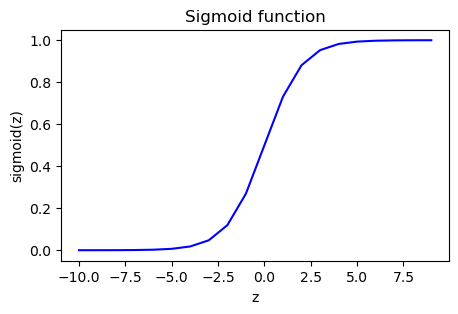

In [5]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z, y, c="b")
ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

As we can see as sigmoid(z) goes towards zero it zero it becomes a large negitive number and as it tends towards 1 z becomes a large positive number.

## Dataset

In [10]:
X = np.array([[0.5, 1.5], 
              [1,1], 
              [1.5, 0.5], 
              [3, 0.5], 
              [2, 2], 
              [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

We want to train a logistic regression model on this data using:
$$f(x) = g(w_0x_0+w_1x_1 + b)$$
where g is:
$$g(z) = \frac{1}{1+e^{-z}}$$

Lets for simplicity sake say we train the model and find values for w0, w1 and b that are: $w_0 = 1, w_1 = 1, b = -3$

Meaning that the first equation above becomes:
$$f(x) = g(1*x_0+1*x_1 -3)$$

We will look at how to obtain these paramaters later.

Remeber that the graph above shows us that if we were to draw a boundry at g(z) >= 0.5 when z >= 0 & and beacuse z = (w X) + b Meaning:
  $$if \mathbf{w} \cdot \mathbf{x} + b >= 0, the model predicts $y=1$$
  
  $$if \mathbf{w} \cdot \mathbf{x} + b < 0, the model predicts $y=0$$
  

## Loss Function
Recall that for linear regression we used the <b>squared error cost function</b>. This cost function works well for linear regression, however it since the sigmoid function is a non linear component using the same cost function creates a horrible function with many local minimas and direction changes. Instead we shall look at the cost function explained below:

## Logistic Regression Cost Function
Logistic regression uses a loss fuction more suited for the task of classification.

$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}

The defining feature of this loss function is that it features two seperate curves. One for when the target is y=0 and when for when the target is y=1.